In [86]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, sparse_encode

In [2]:
data, target = load_iris(return_X_y=True)
test_data = np.array([[1,2,3,2],[2,3,5,2],[1,1,1,1]]).T

In [3]:
class PCAKLT:
    def __init__(self, n_components):
        self.mu_ = None
        self.cov_ = None
        self.eigenvalues_ = None
        self.eigenvectors_ = None
        self.explained_variance_ratio_ = None
        self.components_ = None

        self.n_components = n_components


    def fit(self, X):
        self.mu_ = np.mean(X, axis=0)
        X_zero_mean = np.subtract(X, self.mu_)
        self.cov_ = (X_zero_mean.T @ X_zero_mean) / (X_zero_mean.shape[0]-1)
        # FIXME: eigenvectors have different sign
        self.eigenvalues_, self.eigenvectors_ = np.linalg.eigh(self.cov_)
        self.explained_variance_ratio_ = self.eigenvalues_ / np.sum(self.eigenvalues_)

        if isinstance(self.n_components, int):
            # number of components
            vari = []
            for i, j in enumerate(np.argsort(-self.explained_variance_ratio_)):
                if i >= self.n_components:
                    break
                vari.append(j)
            self.n_components = i
        elif isinstance(self.n_components, float):
            # variance explained
            varsum = 0
            vari = []
            for i, j in enumerate(np.argsort(-self.explained_variance_ratio_)):
                if varsum >= self.n_components:
                    break
                varsum += self.explained_variance_ratio_[j]
                vari.append(j)
            self.n_components = i
        self.components_ = self.eigenvectors_[:, vari].T

        return self

    def transform(self, X):
        X_zero_mean = np.subtract(X, self.mu_)
        # FIXME: transformed values have different sign compared to sklearn
        return (self.components_ @ X_zero_mean.T).T

In [5]:
pca = PCAKLT(2).fit(test_data)
pca.transform(test_data)

array([[-1.35353252,  0.40981667],
       [ 0.        ,  0.        ],
       [ 2.23520712,  0.06204125],
       [-0.8816746 , -0.47185793]])

In [6]:
skpca = PCA(2, svd_solver="full").fit(test_data)
skpca.transform(test_data)

array([[-1.35353252, -0.40981667],
       [ 0.        ,  0.        ],
       [ 2.23520712, -0.06204125],
       [-0.8816746 ,  0.47185793]])

# Q1

In [72]:
q1 = np.array([
    [6.2, 2.6, 6.6, 1.9],
    [7.2, 2.6, 3.0, 1.0],
    [6.9, 2.4, 2.8, 0.4],
    [4.5, 2.6, 3.4, 1.6],
    [4.8, 2.7, 2.8, 1.0]
])

pca_iris = PCA(2).fit(data)
pca_iris.transform(q1)

array([[ 2.85324867, -0.64535598],
       [-0.19183919,  0.7033073 ],
       [-0.66965831,  0.44026152],
       [-0.60994123, -1.18412006],
       [-1.23895339, -0.76481508]])

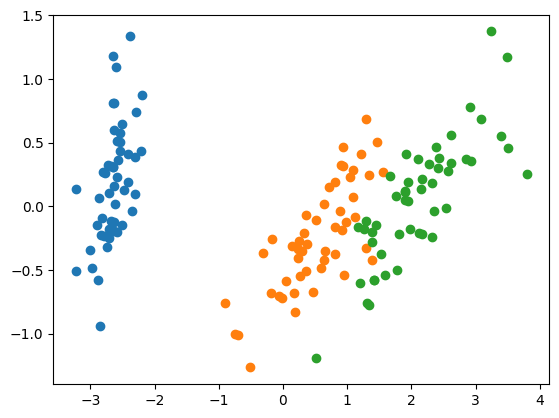

In [90]:
pcs_target = pca_iris.transform(data)
for i in np.unique(target):
    pcs = pcs_target[target==i]
    plt.scatter(x=pcs[:, 0], y=pcs[:, 1])

In [8]:
own_iris = PCAKLT(4).fit(data)
own_iris.transform(q1)

array([[-2.85324867, -0.64535598, -0.11807362, -0.57689597],
       [ 0.19183919,  0.7033073 ,  1.2296544 ,  0.7877199 ],
       [ 0.66965831,  0.44026152,  1.51737368,  0.4007917 ],
       [ 0.60994123, -1.18412006, -0.69981949,  0.19616334],
       [ 1.23895339, -0.76481508, -0.21176112,  0.09454612]])

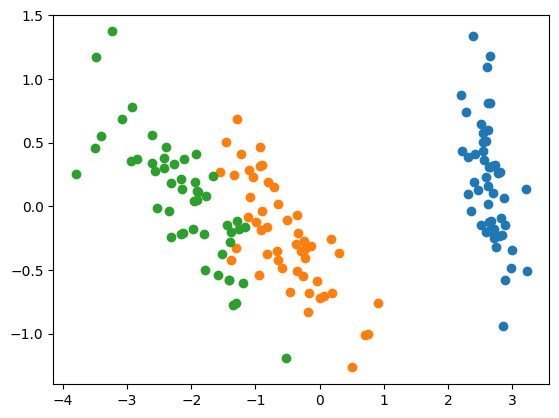

In [93]:
own_target = own_iris.transform(data)
for i in np.unique(target):
    pcs = own_target[target==i]
    plt.scatter(x=pcs[:, 0], y=pcs[:, 1])

# Q2

In [36]:
q2 = np.array([
    [5.6,4.2,6.7,0.2],
    [4.5,2.7,4.9,1.3],
    [7.4,3.5,4.2,2.0],
    [5.9,3.6,6.1,1.9],
    [4.6,2.5,4.3,1.5]
])
# V = pca_iris.transform(q2)
# omp_iris = sparse_encode(data, data, algorithm="omp", n_nonzero_coefs=2, n_jobs=3, alpha=1e-5)
omp_q2_0 = sparse_encode(q2, data[target==0], algorithm="omp", n_nonzero_coefs=2, n_jobs=3, alpha=1e-5)
omp_q2_1 = sparse_encode(q2, data[target==1], algorithm="omp", n_nonzero_coefs=2, n_jobs=3, alpha=1e-5)
omp_q2_2 = sparse_encode(q2, data[target==2], algorithm="omp", n_nonzero_coefs=2, n_jobs=3, alpha=1e-5)

In [66]:
def omp_cost(x, V, y):
    return np.linalg.norm(x - (V.T @ y.T).T, axis=1) + 0.1 * np.linalg.norm(y, ord=0, axis=1)

In [68]:
c0 = omp_cost(q2, data[target==0], omp_q2_0)
c1 = omp_cost(q2, data[target==1], omp_q2_1)
c2 = omp_cost(q2, data[target==2], omp_q2_2)

c0, c1, c2

(array([1.99652649, 1.9887386 , 2.6188647 , 2.6440754 , 1.98671839]),
 array([2.30182136, 0.86291706, 0.96209134, 0.7419029 , 0.58609721]),
 array([1.17074455, 0.53391685, 1.14391454, 0.62563934, 0.28186715]))